Seed: 448883844, a: 65539, c: 0, m: 2147483648,  Period: 2147483648, Count: 1000


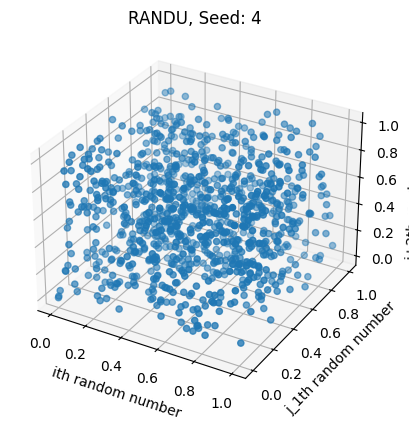

In [1]:
%matplotlib inline
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from IPython.display import display, Math, Latex
import numpy as np
import utils
from pprint import pprint as pp

def rankMiddleSquareMethodSeeds(cnt):
    results = {}
    for seed in range(1000, 10000):
        prNums = middleSquareMethod(seed, cnt, True)
        results[seed] = len(prNums['nums'])
    return dict(sorted(results.items(), key=lambda x:x[1], reverse=True))

# https://en.wikipedia.org/wiki/RANDU
# Seed must be an odd number
def lcgRandu(seed, cnt):
    a = 65539
    c = 0
    m = 2**31
    return lcg(seed, m, a, c, cnt, 'RANDU')

def lcg(seed, m, a, c, cnt, name='LCG', stopAtDup=False):
    prNums = []
    prDups = set()
    period = m
    for i in range(0, cnt):
        seed = ((seed * a) + c) % m      
        prNums.append(seed)
        if seed in prDups:
            period = i
            if stopAtDup:
                rbreak
        prDups.add(seed)   
    return {
        'name': name,
        'seed': seed,
        'm': m,
        'a': a,
        'c': c,
        'cnt': cnt,
        'period': period,
        'nums': np.array(prNums) / m,
    }
    
# The period can be no longer that 8^n
def middleSquareMethod(seed, cnt, stopAtDup=False):
    prNums = []
    prDups = set()
    for i in range(0, cnt):
        seed = str(seed**2).zfill(8)
        seed = int(seed[2:6])
        prNums.append(seed)
        if stopAtDup and seed in prDups:
            period = i + 1
            break
        prDups.add(seed)   
    return {
        'seed': seed,
        'cnt': cnt,
        'len': len(prNums),
        'period': len(prNums) - 1,
        'nums': np.array(prNums)
    }

def primitiveRootModuloN(g, m):
    results = []
    gcd = math.gcd(g, m)
    c = gcd == 1
    display(Math(f"g={g}, \\; m={m}"))
    display(Math(f" gcd \\; ({g}, \\; {m}) = {gcd}"))
    display(Math(f"coprime = {c}"))
    for i in range(1, m):
        pow = a**i
        result = a**i % m
        display(Math(f"{g}^{i} = {pow} \\; \\equiv \\; ${result} mod (${m}) = {result}"))
        results.append(result)
    expLen = len(list(set(results))) 
    isAllGood = (expLen == (m - 1)) 
    display(Math(""))
    display(Math(f"{isAllGood}, \\; {sorted(results)}"))

def plot3D(prNums, bins=10, title="PRNG"):
    print(f"Seed: {prNums['seed']}, a: {prNums['a']}, c: {prNums['c']}, m: {prNums['m']},  Period: {prNums['period']}, Count: {prNums['cnt']}")
    cnt = prNums['cnt']
    y0 = prNums['nums'][0:cnt-2]
    y1 = prNums['nums'][1:cnt-1]
    y2 = prNums['nums'][2:cnt]
    fig = plt.figure(3)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(y0, y1, y2)
    ax.set_xlabel("ith random number")
    ax.set_ylabel("j_1th random number")
    ax.set_zlabel("j+2th random number")
    ax.set_title(title)


seed = 6239
cnt = 1000
bins = 10
a = 3
m = 7
# prNums = middleSquareMethod(seed, cnt, True)
# utils.plot(prNums, bins, f"Middle Square Method, Seed: {seed}")

a = 1103515245
c = 12345
m = 2**31

a = 75
c = 74
seed = 4
cnt = 10**6

#lcg(seed, m, a, c, cnt)
#utils.plot(prNums['nums'], bins, f"LCG, Seed: {seed}")

seed = 2916
cnt = 1000
bins = 10
a = 3
m = 7
#prNums = l
#prNums = middleSquareMethod(seed, cnt, True)
#pp(prNums)
#utils.show(prNums['nums'])

seed = 4
cnt = 10**3
prNums = lcgRandu(seed, cnt)
#utils.plot(prNums, bins, f"Middle Square Method, Seed: {seed}")
plot3D(prNums, bins, f"RANDU, Seed: {seed}")
#primitiveRootModuloN(a, m)

#utils.plot(prNums, bins, f"Middle Square Method, Seed: {seed}")
#utils.plot3D(prNums, bins, f"Middle Square Method, Seed: {seed}")
#utils.show(prNums)

#rankedSeeds = list(rankMiddleSquareMethodSeeds(cnt).keys())[0:10]
#for seed in rankedSeeds:
   #prNums = middleSquareMethod(seed, cnt, True)
    #print(f"Seed: {seed}, Count: {len(prNums)}")
    #utils.show(prNums)

#### 